농어 데이터 시각화


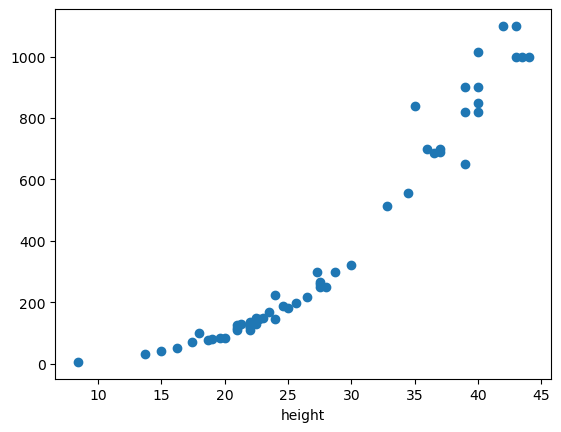

In [7]:
import numpy as np

## 농어의 길이와 무게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

import matplotlib.pyplot as plt
print("농어 데이터 시각화")
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.xlabel("height")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

print(f"length of original array: {len(perch_length)}")

train_input, test_input, train_target, test_target = train_test_split(
    perch_length,
    perch_weight,
    random_state=42
)

print(f"1. type: {type(train_input)}")
print(f"2. size: {train_input.shape}")
print(f"3. dimension: {train_input.ndim}")
print(f"4. length: {len(train_input)}")

length of original array: 56
1. type: <class 'numpy.ndarray'>
2. size: (42,)
3. dimension: 1
4. length: 42


type: <class 'numpy.ndarray'>
shape: (42,)


reshape...
type after reshape: <class 'numpy.ndarray'>
shape after reshape: (42, 1)
test data score = 0.992809406101064
train data score = 0.9698823289099254
predict weight when length [30] is [311.4]


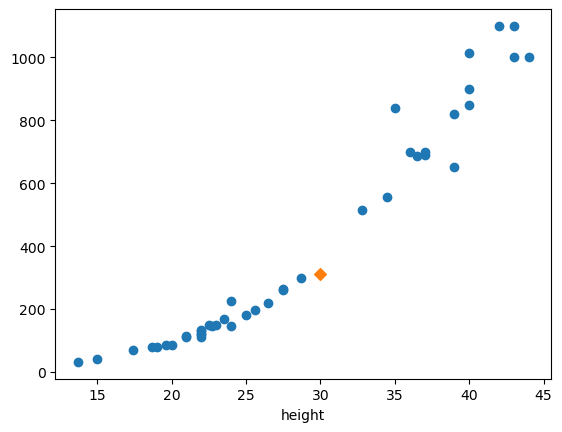



mean absolute error of predict test data: 19.157142857142862


The score using the training data after adjusting the number of neighbors = 0.9804899950518966
The score using the testing data after adjusting the number of neighbors = 0.9746459963987609


In [9]:
## 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(f"type: {type(train_input)}")
print(f"shape: {train_input.shape}") ## (42,) => 1차원

print("\n\nreshape...")
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(f"type after reshape: {type(train_input)}")
print(f"shape after reshape: {train_input.shape}")

## 이웃 회귀 알고리즘
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

## 테스트 데이터와 학습 데이터를 이용한 평가
print(f"test data score = {knr.score(test_input, test_target)}") ## 99.28
print(f"train data score = {knr.score(train_input, train_target)}") ## 96.98
## 과소적합!

## 예측
predict = [30]
prediction = knr.predict([predict])
print(f"predict weight when length {predict} is {prediction}")
## 예측 시각화
plt.scatter(train_input, train_target)
plt.scatter(predict, prediction, marker='D')
plt.xlabel("length")
plt.xlabel("height")
plt.show()

print("\n")
from sklearn.metrics import mean_absolute_error
## 테스트 세트 예측
test_prediction = knr.predict(test_input)
## 예측한 테스트 세트의 에러 절대값의 평균을 구함
## |예측 - 실값| / (테스트 입력 개수)
print(f"mean absolute error of predict test data: {mean_absolute_error(test_target, test_prediction)}")

print("\n")
## 최근접 점의 개수를 줄여 예측
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(f"The score using the training data after adjusting the number of neighbors = {knr.score(train_input, train_target)}") ## 98.04
print(f"The score using the testing data after adjusting the number of neighbors = {knr.score(test_input, test_target)}") ## 97.46
## 학습 데이터를 이용한 평가 점수가 줄었으나 차이는 줄었음

예상 무게: 1033.3333333333333


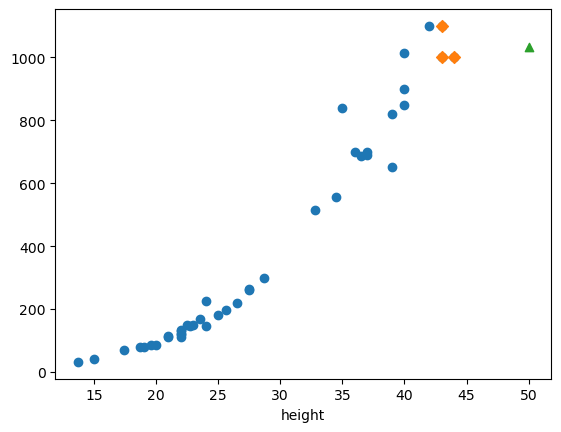

길이 50의 예상 무게: 1033.3333333333333
길이 100의 예상 무게: 1033.3333333333333
길이 150의 예상 무게: 1033.3333333333333
길이 75의 예상 무게: 1033.3333333333333


In [10]:
distances, indexes = knr.kneighbors([[50]])
result = knr.predict([[50]])

print(f"예상 무게: {result[0]}")
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, result, marker="^")
plt.xlabel("length")
plt.xlabel("height")
plt.show()

##값이 학습 데이터에서 지나치게 벗어나는 경우, 항상 동일하게 예측함
##=> 이웃한 점을 가지고 판단하기 때문
for i in [50, 100, 150, 75]:
    result = knr.predict([[i]])
    print(f"길이 {i}의 예상 무게: {result[0]}")

기울기: 39.0171449636302, 절편: -709.0186449535477
길이 50의 예상 무게: 1241.8386032279625
길이 75의 예상 무게: 2217.2672273187172
길이 80의 예상 무게: 2412.352952136868
길이 100의 예상 무게: 3192.6958514094727
길이 150의 예상 무게: 5143.553099590982


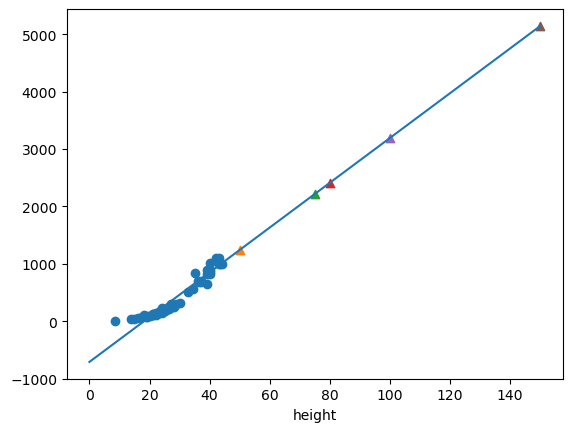

훈련 점수: 0.939846333997604
테스트 점수: 0.8247503123313558


In [ ]:
## 선형 회귀 모델 임포트
from sklearn.linear_model import LinearRegression

## 선형 회귀 알고리즘을 이용한 학습
lr = LinearRegression()
lr.fit(train_input, train_target)


## 추정 직선의 기울기와 절편
print(f"기울기: {lr.coef_[0]}, 절편: {lr.intercept_}")

## 데이터 시각화
plt.scatter(perch_length, perch_weight)
for i in sorted([50, 100, 150, 75, 80]):
    result = lr.predict([[i]])
    print(f"길이 {i}의 예상 무게: {result[0]}")
    plt.scatter(i, result[0], marker="^")
## 추정 직선 그리기
plt.plot([0, 150], [lr.intercept_, 150*lr.coef_[0]+lr.intercept_])
plt.xlabel("length")
plt.xlabel("height")
plt.show()

In [15]:
from matplotlib.lines import Line2D

print("==================all markers========================")
for name, shape in Line2D.markers.items():
    print(f"name: {name}, shape: {shape}")
print("================filled markers=======================")
for c in Line2D.filled_markers:
    print(c, end=' ')

==================all markers========================
name: ., shape: point
name: ,, shape: pixel
name: o, shape: circle
name: v, shape: triangle_down
name: ^, shape: triangle_up
name: <, shape: triangle_left
name: >, shape: triangle_right
name: 1, shape: tri_down
name: 2, shape: tri_up
name: 3, shape: tri_left
name: 4, shape: tri_right
name: 8, shape: octagon
name: s, shape: square
name: p, shape: pentagon
name: *, shape: star
name: h, shape: hexagon1
name: H, shape: hexagon2
name: +, shape: plus
name: x, shape: x
name: D, shape: diamond
name: d, shape: thin_diamond
name: |, shape: vline
name: _, shape: hline
name: P, shape: plus_filled
name: X, shape: x_filled
name: 0, shape: tickleft
name: 1, shape: tickright
name: 2, shape: tickup
name: 3, shape: tickdown
name: 4, shape: caretleft
name: 5, shape: caretright
name: 6, shape: caretup
name: 7, shape: caretdown
name: 8, shape: caretleftbase
name: 9, shape: caretrightbase
name: 10, shape: caretupbase
name: 11, shape: caretdownbase
name: 

In [ ]:
## 선형 회귀의 문제점

print(f"훈련 점수: {lr.score(train_input, train_target)}") ## 93.98
print(f"테스트 점수: {lr.score(test_input, test_target)}") ## 82.47
## 점수가 전체적으로 작게 나온다!

testlen = 15
print(f"길이 {testlen}의 예상 무게: {lr.predict([[testlen]])[0]}") ## -123.76
## 무게 마이너스!

훈련 점수: 0.939846333997604
테스트 점수: 0.8247503123313558
길이가 15일 때의 무게 예측: -123.76147049909468


방정식: 1.0143321093767304x^2 + -21.557924978837356x + 116.05021078278259
길이 50의 예상 무게: 1573.9842352827407
길이 75의 예상 무게: 4204.82395261409
길이 80의 예상 무게: 4883.1417124868685
길이 100의 예상 무게: 8103.57880666635
길이 150의 예상 무게: 19704.833924933613


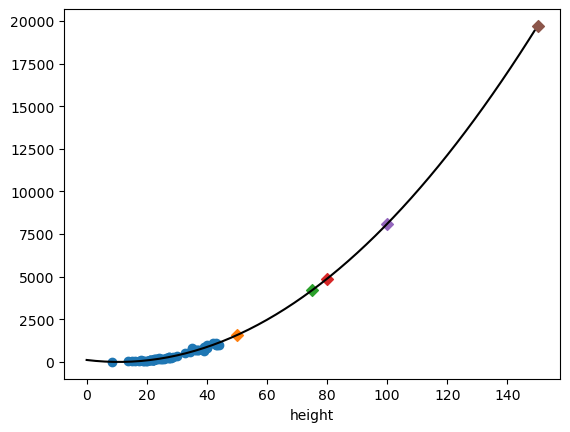

In [32]:
## 다항 회귀 학습용 데이터 준비
## x^2과 x에 대한 특성 2개가 필요하므로 제곱 데이터와 그냥 데이터 2개를 준비
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

## 학습
lr.fit(train_poly, train_target)

## 기울기
a = lr.coef_[0]
b = lr.coef_[1]
c = lr.intercept_
print(f"방정식: {a}x^2 + {b}x + {c}")

## 데이터 시각화
plt.scatter(perch_length, perch_weight)
for i in sorted([50, 100, 150, 75, 80]):
    result = lr.predict([[i * i, i]])[0]
    print(f"길이 {i}의 예상 무게: {result}")
    plt.scatter(i, result, marker='D')
## 곡선 표시
point = np.arange(0, 150)
plt.plot(point, a * point ** 2 + b * point + c, color=(0, 0, 0))
plt.xlabel("length")
plt.xlabel("height")
plt.show()

In [ ]:
## 다항 회귀 후 분석

print(f"훈련 점수: {lr.score(train_poly, train_target)}") ## 97.06
print(f"테스트 점수: {lr.score(test_poly, test_target)}") ## 97.75
## 정상적인 점수

testlen = 15
print(f"길이 {testlen}의 예상 무게: {lr.predict([[testlen ** 2, testlen]])[0]}") ## 20.9
## 정상적인 무게

훈련 점수: 0.9706807451768623
테스트 점수: 0.9775935108325121
길이 15의 예상 무게: 20.906060709986605


In [29]:
## 특성 공학용 데이터 가져오기
import pandas as pd
import numpy as np
import sklearn
tempDataFrame = pd.read_csv("../원본자료/perch_full.csv")
## print(tempDataFrame)
##perch_full = tempDataFrame.to_numpy()
## print(perch_full.shape)

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

## 특성 공학 학습용 데이터 분리
train_input, test_input, train_target, test_target = sklearn.model_selection.train_test_split(
    tempDataFrame,
    perch_weight,
    random_state=42
)

In [ ]:
## 특성 공학 시작
## include_bias: 특성에서 1을 사용할 지 여부(기본값 True)
## degree: 특성의 조합의 개수(기본값 2), 높을수록 안좋음
poly = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_input)

## 만드는 특성의 종류 출력
## numpy의 경우 x01, x02...으로 나타남
print(poly.get_feature_names_out())
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

['length' ' height' ' width' 'length^2' 'length  height' 'length  width'
 ' height^2' ' height  width' ' width^2']


In [49]:
## 특성 없이 학습하는 경우
nonlr = sklearn.linear_model.LinearRegression()
nonlr.fit(train_input, train_target)
print(f"특성 조합 전 학습용 데이터 평가 점수: {nonlr.score(train_input, train_target)}") ## 95.59
print(f"특성 조합 전 테스트 데이터 평가 점수: {nonlr.score(test_input, test_target)}") ## 87.96

## 특성을 조합해 학습하는 경우
lr = sklearn.linear_model.LinearRegression()
lr.fit(train_poly, train_target)
print(f"학습용 데이터 평가 점수: {lr.score(train_poly, train_target)}") ## 99.03
print(f"테스트 데이터 평가 점수: {lr.score(test_poly, test_target)}") ## 97.14

특성 조합 전 학습용 데이터 평가 점수: 0.9559326821885706
특성 조합 전 테스트 데이터 평가 점수: 0.8796419177546366
학습용 데이터 평가 점수: 0.9903183436982125
테스트 데이터 평가 점수: 0.9714559911594155
